IK result: configuration 1
theta1 = -0.952409684908894 rad (-54.5690553126642°)
theta2 = -1.4594553124539327 rad (-83.62062979155719°)

FK check result: x = 8.326672684688674e-17 m, y = -0.3 m


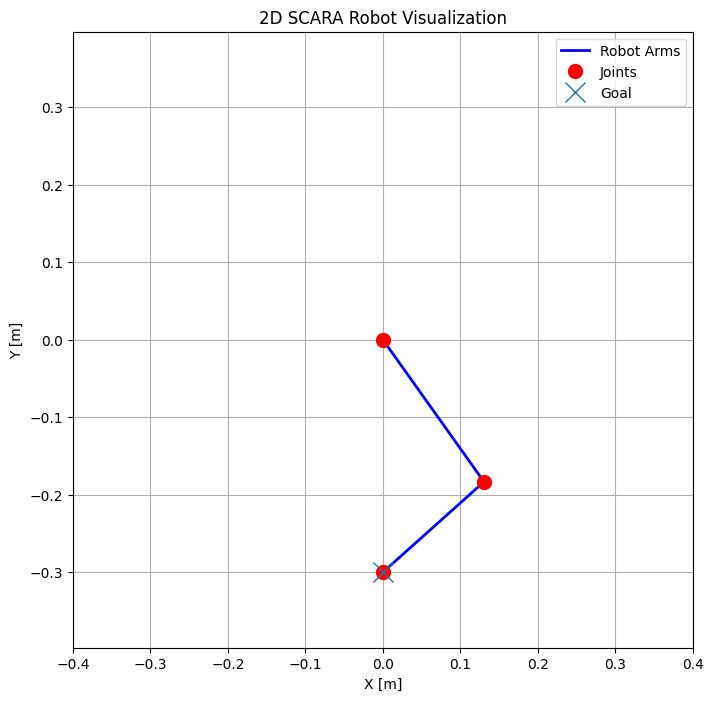

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, cos, sin

# ==  D-H table: LS3-401  ==
# Origin offsets
o = [0, 0]
# Link offsets
d = [0, 0]
# Link lengths
a = [0.225, 0.175]

def FK_dh(th):
    """
    Computation of Forward Kinematics using classic Denavit-Hartenberg (D-H) tables

    :param th: Joints angle
    """

    # Initialize transformation matrix
    A = np.identity(4)

    for i in range(len(th)):
        # Compute individual transformation matrix
        A_x = np.array([
            [cos(th[i]), -sin(th[i]) * cos(o[i]), sin(th[i]) * sin(o[i]), a[i] * cos(th[i])],
            [sin(th[i]), cos(th[i]) * cos(o[i]), -cos(th[i]) * sin(o[i]), a[i] * sin(th[i])],
            [0, sin(o[i]), cos(o[i]), d[i]],
            [0, 0, 0, 1]
        ])

        if i == 0:
            # Assign the first transformation matrix
            A = A_x
        else:
            # Accumulate transformations
            A = A @ A_x

    # Extract the position components
    return A[:2, 3]

## NOTE
# this should be replace by our GE model
def IK_analytical(goal, cfg):
    """
    Inverse Kinematics using analytical method

    :param goal: Target position [x, y] in meters
    :param cfg: Robot configuration (0 or 1)
    :return: Joint angles [theta1, theta2] in radians
    """
    theta = np.zeros(2)

    # Compute theta1
    cosT_beta_numerator = (a[0]**2) + (goal[0]**2 + goal[1]**2) - (a[1]**2)
    cosT_beta_denumerator = 2 * a[0] * np.sqrt(goal[0]**2 + goal[1]**2)

    if abs(cosT_beta_numerator / cosT_beta_denumerator) > 1:
        raise ValueError("Error: Position unreachable!")

    if cfg == 0:
        theta[0] = np.arctan2(goal[1], goal[0]) - np.arccos(cosT_beta_numerator / cosT_beta_denumerator)
    else:
        theta[0] = np.arctan2(goal[1], goal[0]) + np.arccos(cosT_beta_numerator / cosT_beta_denumerator)

    # Compute theta2
    cosT_alpha_numerator = (a[0]**2) + (a[1]**2) - (goal[0]**2 + goal[1]**2)
    cosT_alpha_denumerator = 2 * (a[0] * a[1])

    if abs(cosT_alpha_numerator / cosT_alpha_denumerator) > 1:
        raise ValueError("Error: Position unreachable!")

    if cfg == 0:
        theta[1] = np.pi - np.arccos(cosT_alpha_numerator / cosT_alpha_denumerator)
    else:
        theta[1] = np.arccos(cosT_alpha_numerator / cosT_alpha_denumerator) - np.pi

    return theta

def get_joint_positions(theta):
    """
    Calculate positions of all joints for plotting
    """
    # Base position
    x0, y0 = 0, 0

    # First joint position
    x1 = a[0] * cos(theta[0])
    y1 = a[0] * sin(theta[0])

    # End effector position
    x2 = x1 + a[1] * cos(theta[0] + theta[1])
    y2 = y1 + a[1] * sin(theta[0] + theta[1])

    return np.array([[x0, x1, x2], [y0, y1, y2]])

# Example usage
## Note: this is out input
goal = [0.0, -0.3]  # Target position
cfg = 1  # Robot configuration

# Calculate inverse kinematics
theta = IK_analytical(goal, cfg)

# Print results
print(f"IK result: configuration {cfg}")
print(f"theta1 = {theta[0]} rad ({np.degrees(theta[0])}°)")
print(f"theta2 = {theta[1]} rad ({np.degrees(theta[1])}°)")

# Verify with forward kinematics
## Note: this will be fitness function how result is close to input
xy = FK_dh(theta)
print(f"\nFK check result: x = {xy[0]} m, y = {xy[1]} m")

positions = get_joint_positions(theta)

plt.figure(figsize=(8, 8))
# Plot the links
plt.plot(positions[0], positions[1], 'b-', linewidth=2, label='Robot Arms')
# Plot the joints
plt.plot(positions[0], positions[1], 'ro', markersize=10, label='Joints')
plt.plot(goal[0], goal[1], 'x', markersize=15, label='Goal')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.title('2D SCARA Robot Visualization')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
# Set axis limits to show full workspace
limit = (a[0] + a[1])
plt.xlim(-limit, limit)
plt.ylim(-limit, limit)
plt.show()

IK result: configuration 0
theta1 = -2.1891829686808992 rad (-125.43094468733581°)
theta2 = 1.4594553124539327 rad (83.62062979155719°)

FK check result: x = -5.551115123125783e-17 m, y = -0.3 m


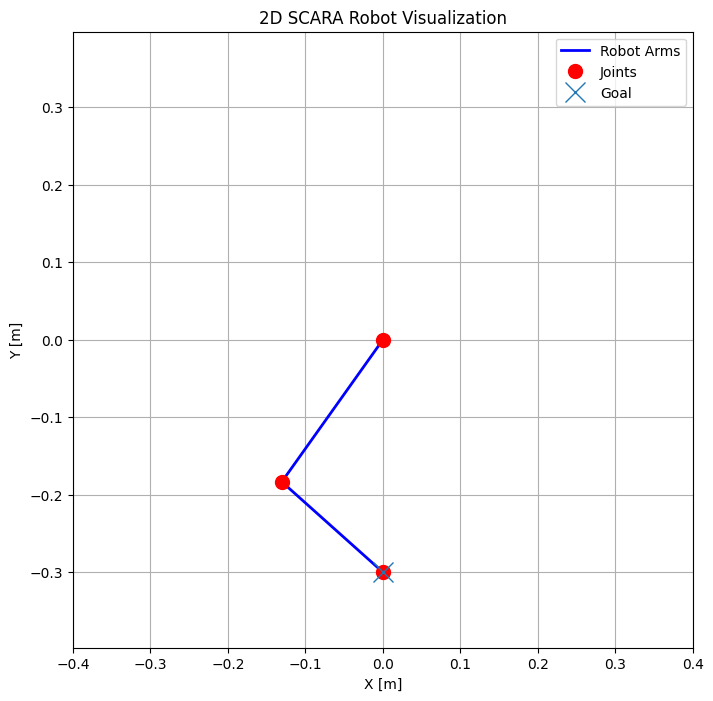

In [14]:
# Example usage
## Note: this is out input
goal = [0.0, -0.3]  # Target position
cfg = 0  # Robot configuration

# Calculate inverse kinematics
theta = IK_analytical(goal, cfg)

# Print results
print(f"IK result: configuration {cfg}")
print(f"theta1 = {theta[0]} rad ({np.degrees(theta[0])}°)")
print(f"theta2 = {theta[1]} rad ({np.degrees(theta[1])}°)")

# Verify with forward kinematics
## Note: this will be fitness function how result is close to input
xy = FK_dh(theta)
print(f"\nFK check result: x = {xy[0]} m, y = {xy[1]} m")

positions = get_joint_positions(theta)

plt.figure(figsize=(8, 8))
# Plot the links
plt.plot(positions[0], positions[1], 'b-', linewidth=2, label='Robot Arms')
# Plot the joints
plt.plot(positions[0], positions[1], 'ro', markersize=10, label='Joints')
plt.plot(goal[0], goal[1], 'x', markersize=15, label='Goal')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.title('2D SCARA Robot Visualization')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
# Set axis limits to show full workspace
limit = (a[0] + a[1])
plt.xlim(-limit, limit)
plt.ylim(-limit, limit)
plt.show()